# Practice Queries from Chapter 3

### Connect to the database

In [24]:
## you need to run this cell only once to run other cells executing queries. If others cell can't run successfully please run this cell again
import pymysql
import pandas as pd # offers data structures and operations for manipulating numerical tables and time series.
import matplotlib
import connectDB # import the file that contains MakeConnection funtion
import ModifyDB # import this file to run insert, delete and update queries
# provide your database servername, port number( default 3306) username to access the database,database password and databasename.
conn = connectDB.MakeConnection("localhost","3306","root","root","university")

Connected to Database Successfully


### Run some Data Access Queries ( Select)

####  i. Find the names of all instructors:   

In [25]:
df = pd.read_sql_query(
    "select name from instructor",conn)
df.head(15)


,name
0,Mozart
1,Einstein
2,El Said
3,Gold
4,Katz
5,John
6,Califieri
7,Hasan Ali
8,Hasan
9,"""Hobber"""


#### ii. Find ID, name and monthly salary of instructor: 

In [26]:
df = pd.read_sql_query(
    "select ID, name, salary/12 as monthly from instructor",conn)
df.head(15)

,ID,name,monthly
0,15151,Mozart,3666.666667
1,22222,Einstein,7916.666667
2,32343,El Said,5000.000000
3,33456,Gold,7250.000000
4,45565,Katz,6250.000000
5,578,John,8333.333333
6,58583,Califieri,5166.666667
7,66899,Hasan Ali,7416.666667
8,669,Hasan,2500.000000
9,"68""","""Hobber""",8333.333333


#### iii. Find all instructors in Comp. Sci. department

In [27]:
df = pd.read_sql_query(
    "select name from instructor where dept_name = 'Comp. Sci.'",conn)
df.head(15)

,name
0,Katz
1,Brandt


#### iv. Find all instructors in Comp. Sci. dept with salary > 80000

In [28]:
df = pd.read_sql_query(
    "select name from instructor where dept_name = 'Comp. Sci.'  and salary > 80000",conn)
df.head(15)

,name
0,Brandt


#### v.	Find the names of all instructors who have taught some course and the course_id

In [29]:
df = pd.read_sql_query(
    "select name, course_id from instructor, teaches where instructor.ID = teaches.ID",conn)
df.head(15)

,name,course_id
0,Mozart,MU-199
1,Einstein,PHY-101
2,El Said,HIS-351
3,Katz,CS-101
4,Katz,CS-319
5,Crick,BIO-101
6,Crick,BIO-301
7,Brandt,CS-190
8,Brandt,CS-190
9,Brandt,CS-319


#### vi.	Find the names of all instructors who have a higher salary than some instructor in ‘Comp. Sci’.

In [30]:
df = pd.read_sql_query(
    "select distinct T.name from instructor as T, instructor as S where T.salary > S.salary and S.dept_name = 'Comp. Sci.'",conn)
df.head(15)

,name
0,Einstein
1,Gold
2,John
3,Hasan Ali
4,"""Hobber"""
5,'gopi4'
6,Hobber's
7,"""gopi2"""
8,Sujon
9,Hobber


#### vii.	Find the names of all instructors whose name includes the substring “in”.

In [31]:
df = pd.read_sql_query(
    "select name from instructor where name like '%in%'",conn)
df.head(15)

,name
0,Einstein


#### viii.	List names of all instructors in ascending order, 

In [32]:
df = pd.read_sql_query(
    "select distinct name from instructor order by name",conn)
df.head(15)

,name
0,"""gopi2"""
1,"""Hobber"""
2,'gopi4'
3,Brandt
4,Califieri
5,Crick
6,Einstein
7,El Said
8,Gold
9,Hasan


#### ix.	Find the average salary of instructors in the Computer Science department 

In [33]:
df = pd.read_sql_query(
    "select avg (salary) from instructor where dept_name= 'Comp. Sci.';",conn)
df.head(15)

,avg (salary)
0,83500.0


#### x.	Find the total number of instructors who teach a course in the Spring 2010 semester

In [34]:
df = pd.read_sql_query(
    "select count(distinct ID) from teaches where semester = 'Spring' and year = 2010",conn)
df.head(15)

,count(distinct ID)
0,4


#### xi.	Find the average salary of instructors in each department 

In [35]:
df = pd.read_sql_query(
    "select dept_name, avg (salary) as avg_salary from instructor group by dept_name;",conn)
df.head(15)

,dept_name,avg_salary
0,Biology,100000.0
1,Comp. Sci.,83500.0
2,History,60250.0
3,Music,44000.0
4,Physics,91000.0


#### xii.	Find the names and average salaries of all departments whose average salary is greater than 42000

In [36]:
df = pd.read_sql_query(
    "select dept_name, avg (salary) from instructor group by dept_name having avg (salary)> 42000;",conn)
df.head(15)

,dept_name,avg (salary)
0,Biology,100000.0
1,Comp. Sci.,83500.0
2,History,60250.0
3,Music,44000.0
4,Physics,91000.0


#### xiii Find the names of all instructors whose salary is greater than the salary of all instructors in the History department.

In [37]:

df = pd.read_sql_query("select * from instructor where salary > all (select salary  from instructor where dept_name = \'History\');",conn)
df.head(15)



,ID,name,dept_name,salary
0,22222,Einstein,Physics,95000.0
1,578,John,Biology,100000.0
2,"68""","""Hobber""",Biology,100000.0
3,688,'gopi4',Biology,100000.0
4,6884,Hobber's,Biology,100000.0
5,6885,"""gopi2""",Biology,100000.0
6,"6887""",Sujon,Biology,100000.0
7,75757,Hobber,Biology,100000.0
8,76766,Crick,Biology,100000.0
9,83821,Brandt,Comp. Sci.,92000.0


### Run Some Data Manipulation Queries- Insert, Delete, Update

#### i insert a new instructor for History department

In [38]:
ModifyDB.insert_records("insert into instructor values(\"66899\", \"Hasan Ali\", \"History\",89000)",conn)

Error 1062: Duplicate entry '66899' for key 'PRIMARY'


#### ii.	Delete all instructors from the Finance department

In [39]:
ModifyDB.delete_records("delete from instructor where dept_name= 'Finance';",conn)

deletion was successful


#### 3.Update salary of all instructors of Biology department to 100000

In [40]:
ModifyDB.update_records("update instructor set salary=100000 where dept_name= 'Biology';",conn)

update was successful


## Data visualization

Connected to Database Successfully


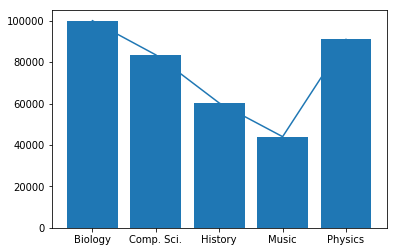

In [44]:
import connectDB # this is to make sure that you are connected to the database
import matplotlib.pyplot as plt
conn = connectDB.MakeConnection("localhost","3306","root","root","university") # call connection function to connect to your database
df = pd.read_sql_query("select dept_name, avg(salary) as avg_salary from instructor group by dept_name",conn)
p = plt.bar(df["dept_name"],df["avg_salary"])
plt.plot(df["avg_salary"])
plt.show()

In [45]:
df1 = pd.read_sql_query("SELECT * from takes;",conn)
val_count = df1["grade"].value_counts()
val_count[val_count.keys()]



A     11
A-     5
B+     4
B      2
C      2
B-     1
C-     1
C+     1
Name: grade, dtype: int64

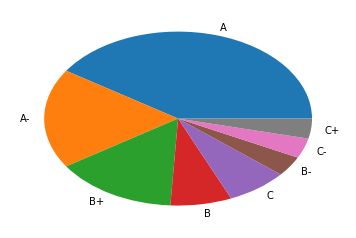

In [46]:
plt.figure()
plt.pie(val_count, labels=val_count.keys())
plt.show()
conn.close()

## Exercise questions

1. Find the names of courses in Computer science department which have 3 credits

2. For the student with ID 12345 (or any other value), show all course_id and title of all courses registered for by the student.

3. Insert at least two records in instructor table for History department.

4. Update budget of Music department by 10%.

5. Delete the classrooms with capacity less than 15